# EDA

In [27]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import scipy.stats as stats

In [4]:
! ls ../src

__init__.py
column_names.md
kc_house_data.csv


In [5]:
data = pd.read_csv('../src/kc_house_data.csv')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [89]:
data['yr_renovated'].isna().sum()

3842

In [91]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [93]:
##columns to drop: id, sqft_lot15, sqft_lot, view, lat, long
##rows to drop/separate: condition < 3, grade < 6

##additional features: price_per_sqft, location categorical, single-level categorical, 
##waterfront categorical, sale month categorical,

In [9]:
column_names = data.columns
column_names

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [94]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
prices = data.price
prices.mean()

540296.5735055795

In [11]:
data.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

C:\Users\svett\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

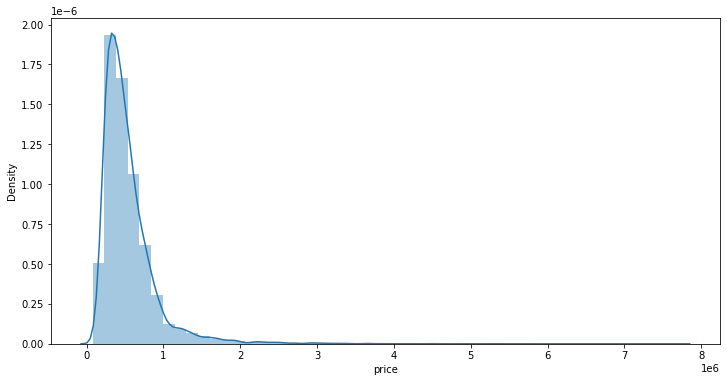

In [19]:
fig, ax = plt.subplots(figsize = (12,6))

sns.distplot(prices)

In [22]:
rooms = data[['bedrooms', 'bathrooms']]

rooms.describe()

,bedrooms,bathrooms
count,21597.000000,21597.000000
mean,3.373200,2.115826
std,0.926299,0.768984
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


In [23]:
data['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [24]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [100]:
data.sqft_basement.describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [99]:
data.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [98]:
data.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [26]:
data.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [103]:
data[data['sqft_basement'] == 0.00].sort_values('sqft_living')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,1923,0.0,98117,47.6778,-122.389,1340,5000,745.945946,153.248195,1431.0
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,1963,0.0,98168,47.4810,-122.323,1170,15000,644.736842,16.333333,14620.0
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,1920,0.0,98103,47.6938,-122.347,1340,5100,628.205128,122.500000,1610.0
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,1953,0.0,98146,47.5077,-122.357,1190,8636,792.682927,37.633164,8226.0
14452,7549801385,6/12/2014,280000.0,1,0.75,420,6720,1.0,0.0,0.0,...,1922,0.0,98108,47.5520,-122.311,1420,6720,666.666667,41.666667,6300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,3023069166,7/8/2014,1140000.0,5,4.00,7320,217800,2.0,0.0,0.0,...,1992,NaN,98058,47.4473,-122.086,3270,34500,155.737705,5.234160,210480.0
11859,8835800350,1/12/2015,1950000.0,4,3.25,7420,167869,2.0,0.0,3.0,...,2002,NaN,98045,47.4548,-121.764,5610,169549,262.803235,11.616201,160449.0
19842,2524069078,1/22/2015,2700000.0,4,4.00,7850,89651,2.0,0.0,0.0,...,2006,0.0,98027,47.5406,-121.982,6210,95832,343.949045,30.116786,81801.0
13398,2426039123,1/30/2015,2420000.0,5,4.75,7880,24250,2.0,0.0,2.0,...,1996,0.0,98177,47.7334,-122.362,2740,10761,307.106599,99.793814,16370.0


In [28]:
good_condition = data[data['condition'] >= 4]
med_condition = data[data['condition'] == 3]
poor_condition = data[data['condition'] < 3]

In [30]:
good_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7378 entries, 3 to 21567
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7378 non-null   int64  
 1   date           7378 non-null   object 
 2   price          7378 non-null   float64
 3   bedrooms       7378 non-null   int64  
 4   bathrooms      7378 non-null   float64
 5   sqft_living    7378 non-null   int64  
 6   sqft_lot       7378 non-null   int64  
 7   floors         7378 non-null   float64
 8   waterfront     6570 non-null   float64
 9   view           7354 non-null   float64
 10  condition      7378 non-null   int64  
 11  grade          7378 non-null   int64  
 12  sqft_above     7378 non-null   int64  
 13  sqft_basement  7378 non-null   object 
 14  yr_built       7378 non-null   int64  
 15  yr_renovated   6063 non-null   float64
 16  zipcode        7378 non-null   int64  
 17  lat            7378 non-null   float64
 18  long   

In [31]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [39]:
formula = 'price ~ sqft_living + sqft_living15'
first = ols(formula = formula, data = data).fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:49:30   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.926e+04   5427.190    -18.290      0.000    -1.1e+05   -8.86e+04
sqft_living     242.4444      2.945     82.329      0.000     236.672     248.216
sqft_living15    68.0527      3.946     17.248      0.000      60.319      75.786
==============================================================================
Omnibus:                    15568.864   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682653.257
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      29.889   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
house_grades = data[data['grade'] >= 6]

In [42]:
house_grades.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

In [64]:
data['price_per_sqft'] = data['price'] / data['sqft_living']
data['price_per_lot_sqft'] = data['price'] / data['sqft_lot']

In [44]:
data['price_per_sqft'].describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

In [52]:
data['sqft_basement'] = data['sqft_basement'].replace("?", np.nan)

In [61]:
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [58]:
data['sqft_above'] = data['sqft_above'].astype('float64')

In [62]:
data['yard_size'] = data['sqft_lot']-data['sqft_above']-data['sqft_basement']

In [60]:
data.dtypes

id                      int64
date                   object
price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront            float64
view                  float64
condition               int64
grade                   int64
sqft_above            float64
sqft_basement          object
yr_built                int64
yr_renovated          float64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
price_per_sqft        float64
price_per_lot_sqft    float64
dtype: object

In [85]:
data.yard_size.value_counts()

 4780.0     20
 3420.0     20
 2910.0     20
 2570.0     19
 3120.0     19
            ..
 2924.0      1
-517.0       1
 7096.0      1
 38057.0     1
 2856.0      1
Name: yard_size, Length: 10578, dtype: int64

In [86]:
data[data['yard_size'] == -517.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size
19974,7234601140,11/13/2014,685000.0,3,2.25,1710,1193,2.0,0.0,0.0,...,2014,0.0,98122,47.6173,-122.31,1510,1193,400.584795,574.182733,-517.0


In [71]:
unincorporated_zipcodes = [98019, 98014, 98024, 98065, 98038, 98051, 98022, 98045, 98288, 98224,98051, 98027, 98029, 98014, 98077, 98053, 98010, 98027, 98070]

In [92]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.005244,0.059813,-0.132485
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.556056,0.308066,0.072544
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.205905,-0.062884,0.019449
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.090285,0.202578,0.071307
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.091167,0.022404,0.151197
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034749,-0.206256,0.999757
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.004651,0.477914,-0.015484
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.197233,0.029918,0.020138
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.221284,0.077953,0.066582
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.103213,-0.086069,-0.008334


In [80]:
unincorporated_zipcodes = list(set(unincorporated_zipcodes))

In [81]:
len(unincorporated_zipcodes)

16

In [82]:
country_data = data[data['zipcode'].isin(unincorporated_zipcodes)]

In [83]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 5 to 21595
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3295 non-null   int64  
 1   date                3295 non-null   object 
 2   price               3295 non-null   float64
 3   bedrooms            3295 non-null   int64  
 4   bathrooms           3295 non-null   float64
 5   sqft_living         3295 non-null   int64  
 6   sqft_lot            3295 non-null   int64  
 7   floors              3295 non-null   float64
 8   waterfront          2950 non-null   float64
 9   view                3285 non-null   float64
 10  condition           3295 non-null   int64  
 11  grade               3295 non-null   int64  
 12  sqft_above          3295 non-null   float64
 13  sqft_basement       3223 non-null   float64
 14  yr_built            3295 non-null   int64  
 15  yr_renovated        2730 non-null   float64
 16  zipco

In [106]:
data['month_sold'] = data['date'].map(lambda x: x.split('/')[0]).astype('int64')

In [107]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,188.050847,39.274336,4470.0,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,74.288870,4672.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,233.766234,18.000000,9230.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,308.163265,120.800000,3040.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,303.571429,63.118812,6400.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,98103,47.6993,-122.346,1530,1509,235.294118,318.302387,-399.0,5
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,98146,47.5107,-122.362,1830,7200,173.160173,68.811285,3503.0,2
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,98144,47.5944,-122.299,1020,2007,394.216667,297.852593,330.0,6
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0.0,98027,47.5345,-122.069,1410,1287,250.000000,167.504188,788.0,1


In [108]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.005244,0.059813,-0.132485,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.556056,0.308066,0.072544,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.205905,-0.062884,0.019449,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.090285,0.202578,0.071307,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.091167,0.022404,0.151197,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034749,-0.206256,0.999757,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.004651,0.477914,-0.015484,0.014245
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.197233,0.029918,0.020138,0.008470
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.221284,0.077953,0.066582,-0.005327
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.103213,-0.086069,-0.008334,0.022388


In [119]:
data['unicorporated'] = np.where(data['zipcode'].isin(unincorporated_zipcodes), 1, 0)

In [123]:
data[data['unicorporated']  == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unicorporated
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,98053,47.6561,-122.005,4760,101930,226.937269,12.067105,96510.0,5,1
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,98038,47.3684,-122.031,2390,7570,170.899471,49.237805,4670.0,3,1
16,1875500060,7/31/2014,395000.0,3,2.00,1890,14040,2.0,0.0,0.0,...,98019,47.7277,-121.962,1890,14018,208.994709,28.133903,12150.0,7,1
30,8562750320,11/10/2014,580500.0,3,2.50,2320,3980,2.0,0.0,0.0,...,98027,47.5391,-122.070,2580,3980,250.215517,145.854271,1660.0,11,1
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,98053,47.6848,-122.016,3625,5639,239.774687,152.862210,NaN,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,7570050450,9/10/2014,347500.0,3,2.50,2540,4760,2.0,0.0,0.0,...,98038,47.3452,-122.022,2540,4571,136.811024,73.004202,2220.0,9,1
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,98053,47.6857,-122.046,3370,6814,203.007519,103.342689,3848.0,9,1
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,98010,47.3095,-122.002,1320,11303,149.333333,18.716578,10468.0,6,1
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,98065,47.5389,-121.881,2270,5731,223.458150,91.627529,3266.0,8,1


In [124]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unicorporated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.005244,0.059813,-0.132485,-0.011572,0.012890
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,-0.053402,0.306692,0.022036,0.585241,0.082845,0.556056,0.308066,0.072544,-0.009928,-0.030687
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.205905,-0.062884,0.019449,-0.001046,-0.005796
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.090285,0.202578,0.071307,0.007543,0.125488
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.091167,0.022404,0.151197,0.012112,0.109243
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034749,-0.206256,0.999757,-0.002591,0.264238
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.004651,0.477914,-0.015484,0.014245,0.135640
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.197233,0.029918,0.020138,0.008470,-0.000678
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,0.085277,0.006141,-0.077894,0.279561,0.073332,0.221284,0.077953,0.066582,-0.005327,-0.025849
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.103213,-0.086069,-0.008334,0.022388,-0.105581
